In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
data = pd.read_csv('/content/Fake_train.csv')
data
test_data=pd.read_csv('/content/Fake_test_without_labels.csv')
test_data

,text
0,5000 ഉള്ള പോൾ ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ...
1,ഓഷോ രജനീഷ് പറഞ്ഞപോലെ എനിക്കപ്പോൾ തോന്നിയത് അ...
2,ചേട്ടാ വാർത്ത വയ്ക്കുന്നത് കേരളത്തിലാണ് സം...
3,Shame for entire Woman&#39
4,135 code janaghal andhu wide business cheythal...
...,...
1014,Correct ...China cheitha ...weapon spread ing ...
1015,ഈ WHO പറയുന്നതനുസരിച്ചു ചികിത്സയും ലോക്ക് ഡൌൺ ...
1016,Mask illa aarkum😏😏
1017,ഇയാളെ കൊറോണ. രോഗി കൾ കിടയിൽ. ഇടാമായിരുന്നു---!!


In [ ]:
text_data = data['text'].astype(str)
labels = data['label']

In [ ]:
if labels.dtype == 'O':
    label_encoder = LabelEncoder()
    labels = label_encoder.fit_transform(labels)

In [ ]:
# Tokenization
tokenizer = Tokenizer()
tokenizer.fit_on_texts(text_data)
sequences = tokenizer.texts_to_sequences(text_data)

In [ ]:
maxlen = 100
vocab_size = len(tokenizer.word_index) + 1

In [ ]:
# Padding sequences
padded_sequences = pad_sequences(sequences, maxlen=maxlen, padding='post')

In [ ]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, labels, test_size=0.2, random_state=95)

In [ ]:
# Build the Bi-GRU model
model = Sequential()
model.add(Embedding(vocab_size, 128, input_length=maxlen))
model.add(Bidirectional(GRU(64, return_sequences=True)))
model.add(Bidirectional(GRU(32)))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/20
66/66 [==============================] - 17s 247ms/step - loss: 0.0173 - accuracy: 0.9952 - val_loss: 0.7554 - val_accuracy: 0.7735
Epoch 2/20
66/66 [==============================] - 16s 247ms/step - loss: 0.0050 - accuracy: 0.9990 - val_loss: 0.8881 - val_accuracy: 0.7543
Epoch 3/20
66/66 [==============================] - 16s 248ms/step - loss: 0.0081 - accuracy: 0.9971 - val_loss: 0.7412 - val_accuracy: 0.7658
Epoch 4/20
66/66 [==============================] - 16s 236ms/step - loss: 0.0081 - accuracy: 0.9976 - val_loss: 0.7413 - val_accuracy: 0.7774
Epoch 5/20
66/66 [==============================] - 17s 262ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.7494 - val_accuracy: 0.7735
Epoch 6/20
66/66 [==============================] - 17s 258ms/step - loss: 0.0045 - accuracy: 0.9990 - val_loss: 0.8291 - val_accuracy: 0.7793


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

21/21 [==============================] - 1s 40ms/step - loss: 0.7100 - accuracy: 0.7715
Test Accuracy: 0.7714723944664001


In [ ]:
# Classification Report
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(classification_report(y_test, y_pred))


21/21 [==============================] - 2s 39ms/step
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       318
           1       0.79      0.76      0.77       334

    accuracy                           0.77       652
   macro avg       0.77      0.77      0.77       652
weighted avg       0.77      0.77      0.77       652



In [ ]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[249  69]
 [ 80 254]]


21/21 [==============================] - 2s 70ms/step


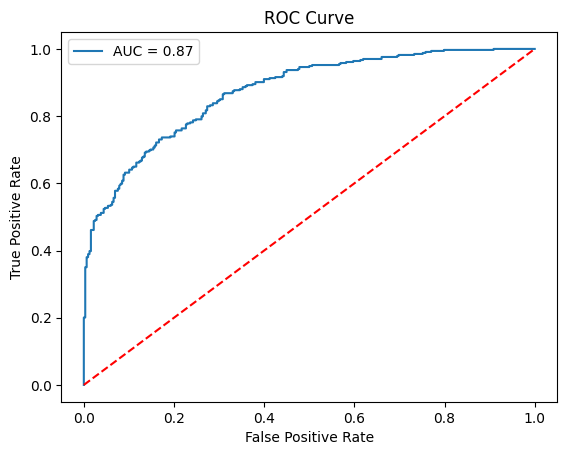

In [ ]:
y_pred_proba = model.predict(X_test)
auc = roc_auc_score(y_test, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

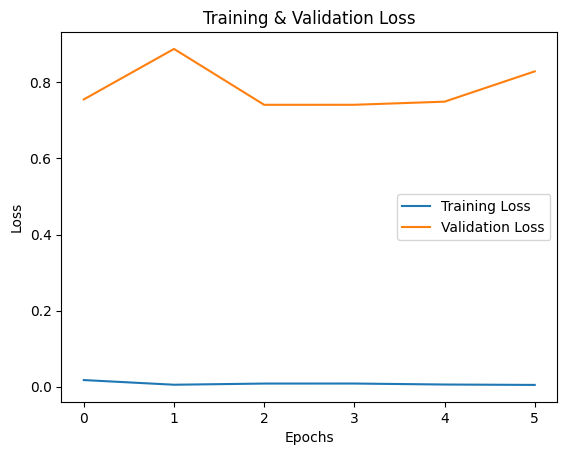

In [ ]:
# Plot Training & Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

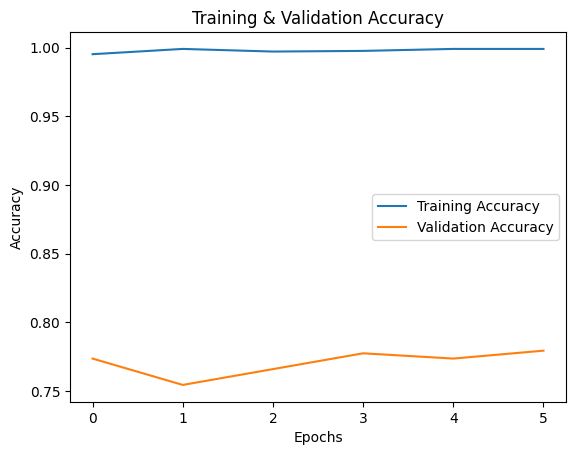

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
classifications = []
max_length = 54
padding_type = 'post'
trunc_type = 'post'
for text in test_data['text']:
    # Tokenize and pad the sequence
    sequences = tokenizer.texts_to_sequences([text])
    sequences = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

    # Perform prediction
    prediction = model.predict(sequences, verbose=0)[0][0]

    # Define a threshold for classification (e.g., 0.5)
    threshold = 0.5

    # Classify based on the threshold
    is_true = prediction >= threshold

    # Append the classification to the list
    classifications.append((text, is_true))

# Print the results
for text, is_true in classifications:
    print(text)
    print(is_true)
# Convert boolean values to strings 'True' or 'False'
classifications = [(text, str(is_true)) for text, is_true in classifications]

# Convert the list of tuples to a DataFrame
df = pd.DataFrame(classifications, columns=['text', 'is_true'])

# Save the DataFrame to a CSV file
df.to_csv('bi_guru_OUTPUT.csv', index=False)


5000 ഉള്ള പോൾ  ലോഗ്‌ഡ്‌വൻ ഇപ്പോള് 250000 എന്താ കാരണം
True
ഓഷോ രജനീഷ്  പറഞ്ഞപോലെ  എനിക്കപ്പോൾ തോന്നിയത് അങ്ങനെയാണ് ..ഇപ്പോൾ തോന്നുന്നത് ഇങ്ങനെയാണ് ...എന്തൊക്കെയോ ആവോ
True
ചേട്ടാ  വാർത്ത  വയ്ക്കുന്നത്  കേരളത്തിലാണ്  സംഘി ഭരിക്കുന്ന നോർത്ത്  ഇന്ത്യയിലല്ല,ഇവിടെ  ആരോഗ്യ മന്ത്രി  ഷൈലടീച്ചറാണ്
False
Shame for entire Woman&#39
True
135 code janaghal andhu wide business cheythalum vijayikum in India
True
Why not all countries club together n block china to the maximum extend, and rename covid 19 as chinese virus? In all such cases when some one work to destroy others,  the nature intervene n contain such negative force.  That is the grace of god, the truth.
False
Ethil appuram നാണക്കേഡ് വന്നിട്ടില്ല cpmne🤣🤣🤣adipoli nalla avatharanam
True
കൊറോണ പോയി ഒന്ന് കൂടെ മെച്ചപ്പെട്ട് ഓമൈക്രോനായി വന്നപ്പോൾ നമ്മുടെ പിണുവിന്റെ നേതൃത്വത്തിൽ ഒരു സീകരണം കൊടുത്തതല്ലേ
False
മോളെ. ഇത് കോമഡി സ്റ്റാർസ് അല്ല. ചിരിച്ചും കളിച്ചും വിശേഷം ചോദിക്കാൻ
False
Marunaadan kandupidutham
False
ഈ പാട്ടിനു ആടിയ ചേച്ചീസിന്റെ തൊലിക്ക